In [76]:
import pandas as pd

# Specify the file path
file_path = "Pdata.xlsx"

# Read the .xlsx file
df = pd.read_excel(file_path)

In [77]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [78]:
RawData = pd.read_excel("PData.xlsx");
print('Number of rows and columns:', RawData.shape);
print('\n  \n**** Summary statistics for the numerical features: \n ')
print(RawData.describe().T)
# Save it to CSV, the copy the tabular data to your report
RawData.describe().T.to_csv("Penrose_data_summary.csv")

Number of rows and columns: (35585, 13)

  
**** Summary statistics for the numerical features: 
 
              count        mean        std     min   25%    50%    75%    max
PM10        34851.0   14.436719   8.841793   -97.0   8.7   13.5   19.0  372.0
Lag1        34851.0   14.436022   8.842058   -97.0   8.7   13.5   19.0  372.0
Lag2        34851.0   14.435554   8.842665   -97.0   8.7   13.5   19.0  372.0
PM2.5       33215.0    5.622165  16.565930 -2529.6   2.6    5.3    8.3  447.7
Temp        34611.0   16.620098   3.945474     3.0  14.0   17.0   20.0   28.0
Humidity    34612.0   69.806267  12.312313    26.9  60.6   70.7   79.9   92.0
Wind Speed  34554.0    2.813518   1.582642     0.2   1.5    2.6    3.9    8.7
Wind Dir    34555.0  181.226161  92.542285     1.0  89.0  214.0  238.0  357.0
NO          34080.0   10.625822  21.579455    -3.8   1.0    4.0   11.5  378.4
NO2         34066.0   14.717096  12.843660    -3.9   4.6   11.1   21.5   84.3
Nox         34081.0   25.138278  31.385045 

In [79]:
# Check for Noisy Data and count of them (Which in our case are negative number since we cant have a measurment of negative values in our dataset)
# Numerical Data
df = RawData.iloc[:, 1:13]
date_column = RawData["Date"]

print('Number of Cell Values That Are Negative:',len(df[df<0]));
#Repalcing noisy data with Nan Value
df = df.mask(df < 0)
#df[df<0] = np.nan
df = df.join(date_column)


df['Date'] = pd.to_datetime(df.Date , format = '%Y-%m-%d %H:%M:%S')

#filter the data up to time 15 november 2022 
#since there is so missing data after this time and we will this time slot for prediction
df = df[df['Date'] <= "2022-11-15 23:00:00"]

df

Number of Cell Values That Are Negative: 35585


,PM10,Lag1,Lag2,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2,Date
0,15.8,10.2,18.6,6.5,18.0,76.1,5.4,52.0,0.2,0.8,1.0,1.7,2018-12-01 00:00:00
1,18.1,9.1,21.4,25.6,18.0,79.1,4.8,60.0,NaN,0.6,0.5,NaN,2018-12-01 01:00:00
2,15.9,8.6,17.8,1.7,18.0,76.4,4.7,61.0,0.0,0.5,0.5,1.4,2018-12-01 02:00:00
3,16.1,9.9,17.5,1.7,18.0,75.1,5.2,53.0,0.0,0.3,0.2,1.6,2018-12-01 03:00:00
4,18.5,7.1,21.7,NaN,18.0,79.2,5.0,56.0,0.2,0.3,0.4,1.5,2018-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,1.0,21.4,21.6,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,2022-11-15 19:00:00
34500,8.5,16.2,10.6,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2022-11-15 20:00:00
34501,0.0,13.5,19.9,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,2022-11-15 21:00:00
34502,3.0,16.7,9.8,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,2022-11-15 22:00:00


<Figure size 1000x600 with 0 Axes>

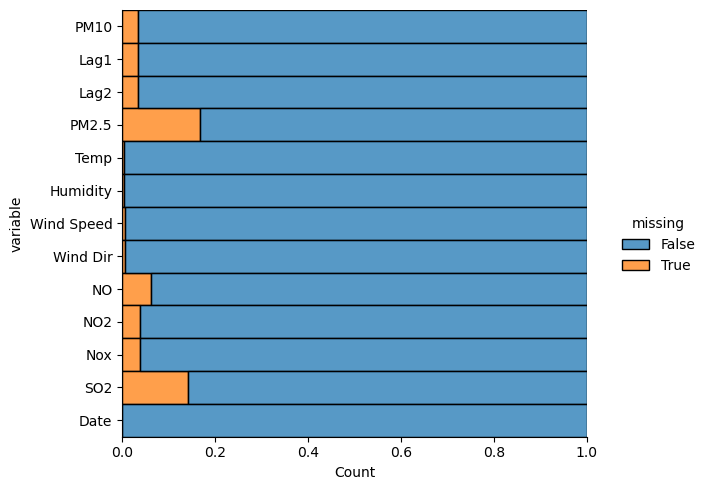

In [80]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [81]:
# Moving Average:
n = 24
df['Temp'] = df['Temp'].fillna(df['Temp'].rolling(window=n, min_periods=1).mean().round())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].rolling(window=n, min_periods=1).mean().round())

 # Set 'Date' column as the index
if not df.index.name == 'Date':
    df.set_index('Date', inplace=True)
    
df['SO2'] = df['SO2'].fillna(df['SO2'].interpolate(method='time'))
df['NO2'] = df['NO2'].fillna(df['NO2'].interpolate(method='time'))
df['NO'] = df['NO'].fillna(df['NO'].interpolate(method='time'))
df['Nox'] = df['Nox'].fillna(df['Nox'].interpolate(method='time'))
df['Wind Dir'] = df['Wind Dir'].fillna(df['Wind Dir'].interpolate(method='time'))
df['Wind Speed'] = df['Wind Speed'].fillna(df['Wind Speed'].interpolate(method='time'))
df['PM10'] = df['PM10'].fillna(df['PM10'].interpolate(method='time'))
df['PM2.5'] = df['PM2.5'].fillna(df['PM10'].interpolate(method='time'))

df.reset_index(inplace=True)

df

,Date,PM10,Lag1,Lag2,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2
0,2018-12-01 00:00:00,15.8,10.2,18.6,6.5,18.0,76.1,5.4,52.0,0.2,0.8,1.0,1.70
1,2018-12-01 01:00:00,18.1,9.1,21.4,25.6,18.0,79.1,4.8,60.0,0.1,0.6,0.5,1.55
2,2018-12-01 02:00:00,15.9,8.6,17.8,1.7,18.0,76.4,4.7,61.0,0.0,0.5,0.5,1.40
3,2018-12-01 03:00:00,16.1,9.9,17.5,1.7,18.0,75.1,5.2,53.0,0.0,0.3,0.2,1.60
4,2018-12-01 04:00:00,18.5,7.1,21.7,18.5,18.0,79.2,5.0,56.0,0.2,0.3,0.4,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,2022-11-15 19:00:00,1.0,21.4,21.6,0.4,17.0,79.0,2.4,217.0,41.5,31.2,72.6,0.60
34500,2022-11-15 20:00:00,8.5,16.2,10.6,0.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.90
34501,2022-11-15 21:00:00,0.0,13.5,19.9,2.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.80
34502,2022-11-15 22:00:00,3.0,16.7,9.8,4.6,17.0,81.0,2.4,217.0,41.5,31.2,72.6,0.80


<Figure size 1000x600 with 0 Axes>

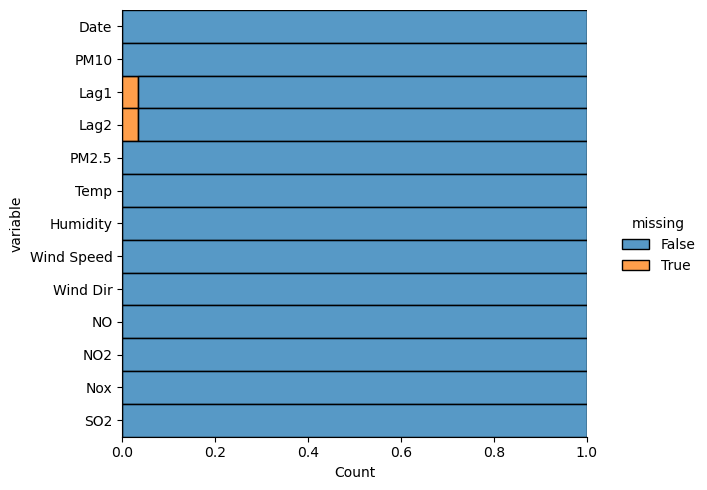

In [82]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [83]:
# Compute lag column (1 period shift)
df['lag1'] = df['PM10'].shift(24) #24 hours before

# Compute lag2 column (2 periods shift)
df['lag2'] = df['PM10'].shift(48) #48 hours before

In [84]:
df = df[df['Date'] >= "2018-12-01 00:00:00"]
df.reset_index(inplace=True)

df

,index,Date,PM10,Lag1,Lag2,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2,lag1,lag2
0,0,2018-12-01 00:00:00,15.8,10.2,18.6,6.5,18.0,76.1,5.4,52.0,0.2,0.8,1.0,1.70,NaN,NaN
1,1,2018-12-01 01:00:00,18.1,9.1,21.4,25.6,18.0,79.1,4.8,60.0,0.1,0.6,0.5,1.55,NaN,NaN
2,2,2018-12-01 02:00:00,15.9,8.6,17.8,1.7,18.0,76.4,4.7,61.0,0.0,0.5,0.5,1.40,NaN,NaN
3,3,2018-12-01 03:00:00,16.1,9.9,17.5,1.7,18.0,75.1,5.2,53.0,0.0,0.3,0.2,1.60,NaN,NaN
4,4,2018-12-01 04:00:00,18.5,7.1,21.7,18.5,18.0,79.2,5.0,56.0,0.2,0.3,0.4,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,34499,2022-11-15 19:00:00,1.0,21.4,21.6,0.4,17.0,79.0,2.4,217.0,41.5,31.2,72.6,0.60,21.4,21.6
34500,34500,2022-11-15 20:00:00,8.5,16.2,10.6,0.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.90,16.2,10.6
34501,34501,2022-11-15 21:00:00,0.0,13.5,19.9,2.6,17.0,80.0,2.4,217.0,41.5,31.2,72.6,0.80,13.5,19.9
34502,34502,2022-11-15 22:00:00,3.0,16.7,9.8,4.6,17.0,81.0,2.4,217.0,41.5,31.2,72.6,0.80,16.7,9.8


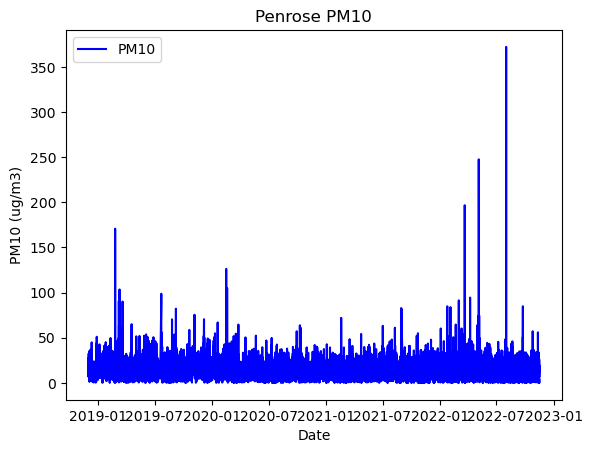

In [85]:
# Visualising the results
fig, ax = plt.subplots()

ax.plot(df["Date"], df["PM10"], color='blue', label='PM10')

ax.set_title('Penrose PM10')
ax.set_xlabel('Date')
ax.set_ylabel('PM10 (ug/m3)')
ax.legend()

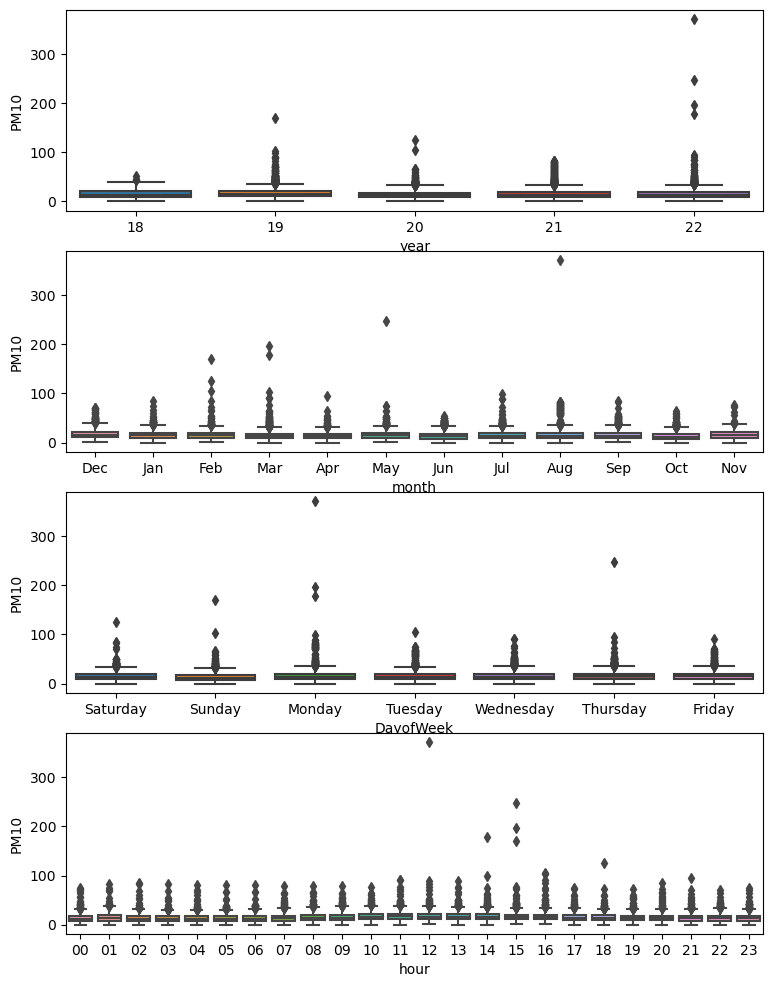

In [86]:
"""
(Do a proper EDA (Exploratory data analysis )) !!
"""

df['year'] = pd.to_datetime(df['Date']).dt.strftime('%y')
df['month'] = pd.to_datetime(df['Date']).dt.strftime('%b')
df['DayofWeek'] = pd.to_datetime(df['Date']).dt.strftime('%A')
df['hour'] = pd.to_datetime(df['Date']).dt.strftime('%H')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig.set_figheight(12)
fig.set_figwidth(9)

sns.boxplot(x='year', y='PM10', data=df, ax=ax1)
sns.boxplot(x='month', y='PM10', data=df, ax=ax2)
sns.boxplot(x='DayofWeek', y='PM10', data=df, ax=ax3)
sns.boxplot(x='hour', y='PM10', data=df, ax=ax4) 

plt.show()

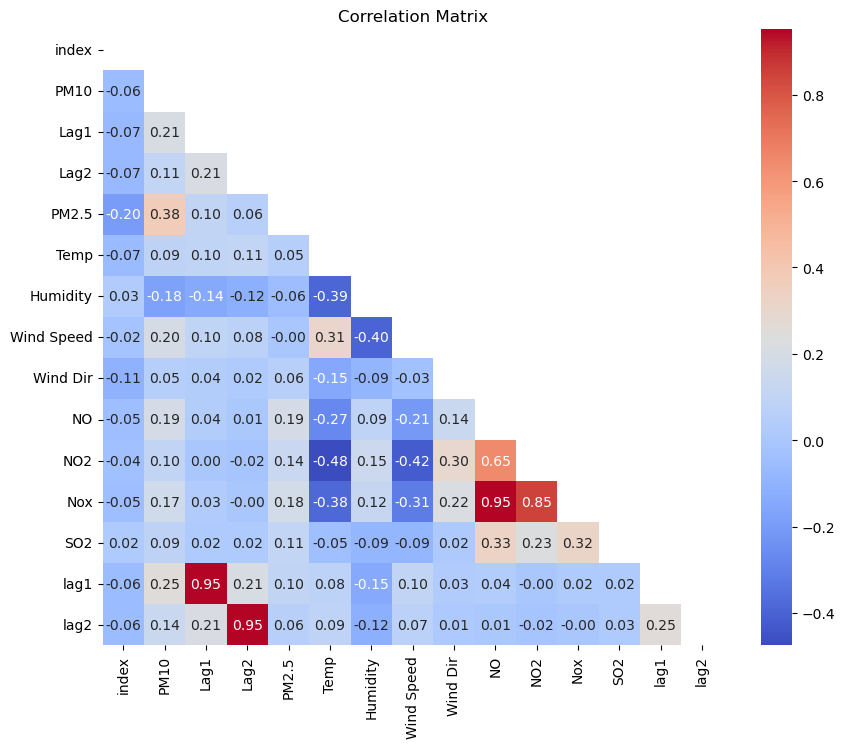

In [92]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the correlation heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax)

# Set plot title
plt.title("Correlation Matrix")

# Show the plot
plt.show()


In [98]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Identify numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Replace negative values with NaN
df[numeric_columns] = df[numeric_columns].mask(df[numeric_columns] < 0)

# Replace NaN values with means
df.fillna(df.mean(), inplace=True)

# Select the variables for regression
variables = ['PM2.5','Lag1', 'Lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
X = df[variables]
y = df['PM10']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results
print(results.summary())

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Correlation Coefficient (R2):", r2)

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     983.5
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:18:27   Log-Likelihood:                -94706.
No. Observations:               27603   AIC:                         1.894e+05
Df Residuals:                   27593   BIC:                         1.895e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0325      0.537      9.363      0.0

In [94]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Identify numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Replace negative values with NaN
df[numeric_columns] = df[numeric_columns].mask(df[numeric_columns] < 0)

# Replace NaN values with means
df.fillna(df.mean(), inplace=True)

# Select the variables for regression
variables = ['Lag1', 'Lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
X = df[variables]
y = df['PM10']

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results
print(results.summary())

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Correlation Coefficient (R2):", r2)



                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     590.6
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:14:45   Log-Likelihood:                -96365.
No. Observations:               27603   AIC:                         1.927e+05
Df Residuals:                   27594   BIC:                         1.928e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0781      0.571      8.897      0.0

In [99]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Identify numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Replace negative values with NaN
df[numeric_columns] = df[numeric_columns].mask(df[numeric_columns] < 0)

# Replace NaN values with means
df.fillna(df.mean(), inplace=True)

# Select the variables for regression
variables = ['PM2.5', 'Lag1', 'Lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
X = df[variables]
y = df['PM10']

# Add squared terms for explanatory variables
X_squared = X.apply(np.square)
X = pd.concat([X, X_squared], axis=1)

# Add a constant term to the predictor variables
X = sm.add_constant(X)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Fit the regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the regression results
print(results.summary())

# Calculate evaluation metrics
y_pred = results.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))
r2 = results.rsquared

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Correlation Coefficient (R2):", r2)


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     571.8
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:29:20   Log-Likelihood:                -94170.
No. Observations:               27603   AIC:                         1.884e+05
Df Residuals:                   27584   BIC:                         1.885e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6095      1.394     -4.740      0.0

In [14]:
# Drop 'lag1' and 'lag2' columns from the DataFrame
df_dropped = df.drop(['lag1', 'lag2'], axis=1)

# Compute the correlation matrix
correlation_matrix = df_dropped.corr()

# Create a styled table
correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm')

# Display the correlation table
correlation_table


,index,PM10,Lag1,Lag2,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,Nox,SO2
index,1.000000,-0.062371,-0.070252,-0.071422,-0.197858,-0.065951,0.030067,-0.022304,-0.106625,-0.051279,-0.040398,-0.048157,0.023019
PM10,-0.062371,1.000000,0.209151,0.109421,0.375045,0.087489,-0.178522,0.196384,0.052162,0.189880,0.099566,0.170263,0.085646
Lag1,-0.070252,0.209151,1.000000,0.213560,0.103154,0.095706,-0.142061,0.095648,0.041348,0.041955,0.001642,0.029518,0.022842
Lag2,-0.071422,0.109421,0.213560,1.000000,0.057333,0.107959,-0.118564,0.076060,0.022667,0.006507,-0.018230,-0.002563,0.021345
PM2.5,-0.197858,0.375045,0.103154,0.057333,1.000000,0.054058,-0.057354,-0.001581,0.056328,0.190166,0.136054,0.182286,0.108886
Temp,-0.065951,0.087489,0.095706,0.107959,0.054058,1.000000,-0.387548,0.309058,-0.151919,-0.274464,-0.475419,-0.383882,-0.045482
Humidity,0.030067,-0.178522,-0.142061,-0.118564,-0.057354,-0.387548,1.000000,-0.395647,-0.090870,0.089698,0.147422,0.121405,-0.087036
Wind Speed,-0.022304,0.196384,0.095648,0.076060,-0.001581,0.309058,-0.395647,1.000000,-0.034275,-0.209650,-0.422752,-0.314373,-0.089425
Wind Dir,-0.106625,0.052162,0.041348,0.022667,0.056328,-0.151919,-0.090870,-0.034275,1.000000,0.143172,0.295542,0.218229,0.017629
NO,-0.051279,0.189880,0.041955,0.006507,0.190166,-0.274464,0.089698,-0.209650,0.143172,1.000000,0.647514,0.950426,0.327504


In [106]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format ='retina'

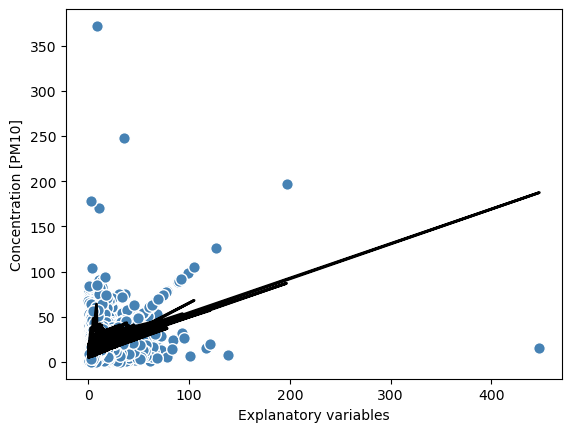

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = df[['PM2.5','Lag1', 'Lag2','Temp','Humidity','Wind Speed', 'Wind Dir','NO','NO2','SO2']].values
y = df['PM10'].values

# Applying Sklearn linear regression model
slr = LinearRegression()
slr.fit(x, y)

def lin_reg_plot(X, y, model):
    plt.scatter(X[:, 0], y, c='steelblue', edgecolor='white', s=70)  # Plotting the first feature against y
    plt.plot(X[:, 0], model.predict(X), color='black', lw=2)  # Plotting the regression line
    plt.xlabel('Explanatory variables')
    plt.ylabel('Concentration [PM10]')
    plt.show()

lin_reg_plot(x, y, slr)


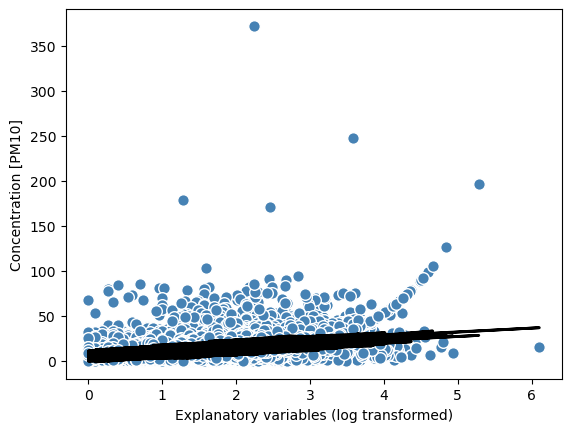

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Apply logarithmic transformation to the features
log_x = np.log1p(x)

# Applying Sklearn linear regression model
slr = LinearRegression()
slr.fit(log_x, y)

def lin_reg_plot(X, y, model):
    plt.scatter(X[:, 0], y, c='steelblue', edgecolor='white', s=70)  # Plotting the first feature against y
    plt.plot(X[:, 0], model.predict(X), color='black', lw=2)  # Plotting the regression line
    plt.xlabel('Explanatory variables (log transformed)')
    plt.ylabel('Concentration [PM10]')
    plt.show()

lin_reg_plot(log_x, y, slr)


The varying thickness of the regression line could be an indication of heteroscedasticity in the data, which means that the variance of the residuals (the differences between the actual values and the predicted values) is not constant across the range of the independent variable.
This could be because of the presence of outliers or the violation of certain assumptions of the linear regression model. One common assumption is that the error terms should have constant variance (homoscedasticity).

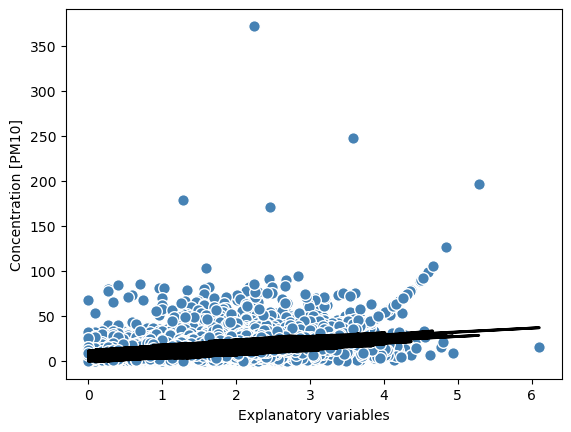

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data and select the features and target variable

X = df[['PM2.5','Lag1', 'Lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO', 'NO2', 'SO2']]
y = df['PM10']

# Apply logarithmic transformation to the features
X_log = np.log1p(X)

# Initialize and fit the linear regression model
slr = LinearRegression()
slr.fit(X_log, y)

# Define a function to plot the regression line
def lin_reg_plot(X, y, model):
    plt.scatter(X[:, 0], y, c='steelblue', edgecolor='white', s=70)  # Plotting the first feature against y
    plt.plot(X[:, 0], model.predict(X), color='black', lw=2)  # Plotting the regression line
    plt.xlabel('Explanatory variables')
    plt.ylabel('Concentration [PM10]')
    plt.show()

# Plot the regression line
lin_reg_plot(X_log.to_numpy(), y, slr)


In [18]:

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a column of ones as the constant term to the feature matrix X
X_constant = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Calculate the VIF for each feature
vif = [variance_inflation_factor(X_constant, i) for i in range(X_constant.shape[1])]

# Create a DataFrame to display the VIF values
vif_data = pd.DataFrame({'Feature': ['Constant'] + list(X.columns), 'VIF': vif})
vif_data = vif_data.set_index('Feature')

# Display the VIF values
print(vif_data)


                   VIF
Feature               
Constant    136.810889
Lag1          1.071720
Lag2          1.061997
Temp          1.513713
Humidity      1.405329
Wind Speed    1.442160
Wind Dir      1.137688
NO            1.862801
NO2           2.504142
SO2           1.148644


Based on these VIF values, it appears that multicollinearity is not a major issue in our model except for NO2 i.e., 2.504142

In [104]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

# Fit the linear regression model
lin_reg = sm.OLS(y, X_constant).fit()

# Call the homoscedasticity_test function
homoscedasticity_test(lin_reg)


sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    fitted_vals = model.fittedvalues
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1, 2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    # Perform Breusch-Pagan test
    names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    bp_test = lzip(names, het_breuschpagan(resids, model.model.exog))

    # Perform Goldfeld-Quandt test
    gq_test = lzip(['F statistic', 'p-value'], het_goldfeldquandt(resids, model.model.exog)[:-1])

    print('Breusch-Pagan test ----')
    for name, stat in bp_test:
        print(f'{name}: {stat}')

    print('\nGoldfeld-Quandt test ----')
    for name, stat in gq_test:
        print(f'{name}: {stat}')

# Apply the function to your linear regression model
homoscedasticity_test(lin_reg)


NameError: name 'homoscedasticity_test' is not defined

In [109]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create your time series regression model
model = sm.OLS(y_train, X_train)

# Fit the model and calculate residuals
results = model.fit()
residuals = results.resid

# Calculate the autocorrelation function (ACF)
acf_vals = acf(residuals, nlags=10)

# Find the first lag with ACF value below a threshold (e.g., 0.05)
lag_order = np.argmax(acf_vals < 0.05)

# Fit the model with Newey-West standard errors
nw_results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lag_order})

# Get coefficient estimates and robust standard errors
coefs = nw_results.params
robust_se = nw_results.bse

# Print the coefficient estimates and robust standard errors
print("Coefficient Estimates:")
print(coefs)
print("\nRobust Standard Errors (Newey-West):")
print(robust_se)

# Make predictions on the test set
y_pred = results.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)



Coefficient Estimates:
const        -5.576303
PM2.5         0.471080
Lag1          0.182500
Lag2          0.048502
Temp          0.253174
Humidity      0.334103
Wind Speed   -0.549076
Wind Dir     -0.012242
NO2           0.022361
SO2           0.276983
PM2.5        -0.000934
Lag1         -0.000709
Lag2         -0.000166
Temp         -0.004773
Humidity     -0.002838
Wind Speed    0.256778
Wind Dir      0.000033
NO2           0.001677
SO2          -0.001482
dtype: float64

Robust Standard Errors (Newey-West):
const         1.588612
PM2.5         0.019110
Lag1          0.008907
Lag2          0.007758
Temp          0.087014
Humidity      0.044007
Wind Speed    0.125479
Wind Dir      0.002426
NO2           0.013219
SO2           0.037497
PM2.5         0.000152
Lag1          0.000140
Lag2          0.000047
Temp          0.002672
Humidity      0.000319
Wind Speed    0.018123
Wind Dir      0.000007
NO2           0.000250
SO2           0.000231
dtype: float64

Evaluation Metrics:
Root Mean Squa

In [7]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Select the variables for regression
variables = ['PM2.5', 'Lag1', 'Lag2', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
X = df[variables]
y = df['PM10']

# # Add squared terms for explanatory variables
# X_squared = X.apply(np.square)
# X = pd.concat([X, X_squared], axis=1)
# # Add a constant term to the predictor variables
# X = sm.add_constant(X)


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the data into training and testing sets
train_size = int(0.8 * len(df))  # 80% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create your time series regression model
model = sm.OLS(y_train, X_train)

# Fit the model and calculate residuals
results = model.fit()
residuals = results.resid

# Calculate the autocorrelation function (ACF)
acf_vals = acf(residuals, nlags=12)

# Find the first lag with ACF value below a threshold (e.g., 0.05)
lag_order = np.argmax(acf_vals < 0.05)

# Fit the model with Newey-West standard errors
nw_results = model.fit(cov_type='HAC', cov_kwds={'maxlags': lag_order})

# Get coefficient estimates and robust standard errors
coefs = nw_results.params
robust_se = nw_results.bse



# Print the regression results
print(results.summary())

# Calculate evaluation metrics
y_pred = results.predict(X_test)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
mae = np.mean(np.abs(y_test - y_pred))
r2 = results.rsquared

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Correlation Coefficient (R2):", r2)

                                 OLS Regression Results                                
Dep. Variable:                   PM10   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                          1.315e+04
Date:                Fri, 16 Jun 2023   Prob (F-statistic):                        0.00
Time:                        09:44:25   Log-Likelihood:                         -94750.
No. Observations:               27603   AIC:                                  1.895e+05
Df Residuals:                   27594   BIC:                                  1.896e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

VIF values below 5 are often considered acceptable, indicating a reasonably low level of multicollinearity. 
The majority of the predictor variables have VIF values below 2.5, suggesting that multicollinearity is not a severe issue in the model. However, the NO2 predictor has a VIF above 2.5, indicating a relatively higher degree of multicollinearity with the other predictors. 

In [110]:

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a column of ones as the constant term to the feature matrix X
X_constant = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Calculate the VIF for each feature
vif = [variance_inflation_factor(X_constant, i) for i in range(X_constant.shape[1])]

# Create a DataFrame to display the VIF values
vif_data = pd.DataFrame({'Feature': ['Constant'] + list(X.columns), 'VIF': vif})
vif_data = vif_data.set_index('Feature')

# Display the VIF values
print(vif_data)

                   VIF
Feature               
Constant      0.000000
const         0.000000
PM2.5         1.554452
Lag1          1.752399
Lag2          1.727270
Temp         48.830311
Humidity    112.192527
Wind Speed   17.755726
Wind Dir     21.415186
NO2          11.837366
SO2           3.020150
PM2.5         1.446051
Lag1          1.634518
Lag2          1.630899
Temp         48.197331
Humidity    111.776759
Wind Speed   15.889365
Wind Dir     19.484574
NO2           9.591178
SO2           2.742359


In [113]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the data
variables = ['PM10', 'PM2.5', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
descriptive_stats = df[variables].describe().transpose()

# Display the descriptive statistics table
print(descriptive_stats)


              count        mean        std   min   25%    50%    75%    max
PM10        34504.0   14.792184   8.975273   0.0   8.9   13.7   19.2  372.0
PM2.5       34504.0    8.239843   7.442374   0.0   4.0    6.5   10.3  447.7
Temp        34504.0   16.591444   3.940989   3.0  14.0   16.0   20.0   28.0
Humidity    34504.0   69.797380  12.289822  26.9  60.7   70.7   79.9   92.0
Wind Speed  34504.0    2.823768   1.593866   0.2   1.5    2.6    3.9    8.7
Wind Dir    34504.0  181.535608  92.468721   1.0  91.0  215.0  238.0  357.0
NO2         34504.0   14.908123  12.863990   0.0   4.7   11.3   21.9   84.3
SO2         34504.0    1.038228   2.432205   0.0   0.2    0.6    1.1  221.1


In [118]:
import pandas as pd
from tabulate import tabulate

# Assuming you have a DataFrame named 'df' containing the data
variables = ['PM10', 'PM2.5', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
descriptive_stats = df[variables].describe()

# Convert descriptive statistics to a formatted table
stats_table = tabulate(descriptive_stats, headers='keys', tablefmt='fancy_grid')

# Print the descriptive statistics table
print("Descriptive Statistics:")
print(stats_table)


Descriptive Statistics:
╒═══════╤═════════════╤═════════════╤═════════════╤════════════╤══════════════╤════════════╤════════════╤═════════════╕
│       │        PM10 │       PM2.5 │        Temp │   Humidity │   Wind Speed │   Wind Dir │        NO2 │         SO2 │
╞═══════╪═════════════╪═════════════╪═════════════╪════════════╪══════════════╪════════════╪════════════╪═════════════╡
│ count │ 34504       │ 34504       │ 34504       │ 34504      │  34504       │ 34504      │ 34504      │ 34504       │
├───────┼─────────────┼─────────────┼─────────────┼────────────┼──────────────┼────────────┼────────────┼─────────────┤
│ mean  │    14.7922  │     8.23984 │    16.5914  │    69.7974 │      2.82377 │   181.536  │    14.9081 │     1.03823 │
├───────┼─────────────┼─────────────┼─────────────┼────────────┼──────────────┼────────────┼────────────┼─────────────┤
│ std   │     8.97527 │     7.44237 │     3.94099 │    12.2898 │      1.59387 │    92.4687 │    12.864  │     2.43221 │
├───────┼───────

In [117]:
import pandas as pd
from tabulate import tabulate

# Assuming you have a DataFrame named 'df' containing the data
variables = ['PM10', 'PM2.5', 'Temp', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
correlation_matrix = df[variables].corr()

# Convert correlation matrix to a formatted table
correlation_table = tabulate(correlation_matrix, headers='keys', tablefmt='fancy_grid')

# Print the correlation table
print("Correlation Matrix:")
print(correlation_table)


Correlation Matrix:
╒════════════╤════════════╤═════════════╤════════════╤════════════╤══════════════╤════════════╤════════════╤════════════╕
│            │       PM10 │       PM2.5 │       Temp │   Humidity │   Wind Speed │   Wind Dir │        NO2 │        SO2 │
╞════════════╪════════════╪═════════════╪════════════╪════════════╪══════════════╪════════════╪════════════╪════════════╡
│ PM10       │  1         │  0.375045   │  0.0874894 │ -0.178522  │   0.196384   │  0.0521621 │  0.0995659 │  0.0856456 │
├────────────┼────────────┼─────────────┼────────────┼────────────┼──────────────┼────────────┼────────────┼────────────┤
│ PM2.5      │  0.375045  │  1          │  0.054058  │ -0.0573539 │  -0.00158057 │  0.0563277 │  0.136054  │  0.108886  │
├────────────┼────────────┼─────────────┼────────────┼────────────┼──────────────┼────────────┼────────────┼────────────┤
│ Temp       │  0.0874894 │  0.054058   │  1         │ -0.387548  │   0.309058   │ -0.151919  │ -0.475419  │ -0.0454815 │
├───

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Save the dataset to a CSV file
df.to_csv('Df_Clean.csv', index=False)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score
import math

In [2]:
df = pd.read_csv("Df_Clean.csv");
df

,index,Date,PM10,Lag1,Lag2,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,...,Wind Speed^2,Wind Speed Wind Dir,Wind Speed NO2,Wind Speed SO2,Wind Dir^2,Wind Dir NO2,Wind Dir SO2,NO2^2,NO2 SO2,SO2^2
0,0,2018-12-01 00:00:00,15.8,10.2,18.6,6.5,18.0,76.1,5.4,52.0,...,29.16,280.8,4.32,9.18,2704.0,41.6,88.4,0.64,1.36,2.8900
1,1,2018-12-01 01:00:00,18.1,9.1,21.4,25.6,18.0,79.1,4.8,60.0,...,23.04,288.0,2.88,7.44,3600.0,36.0,93.0,0.36,0.93,2.4025
2,2,2018-12-01 02:00:00,15.9,8.6,17.8,1.7,18.0,76.4,4.7,61.0,...,22.09,286.7,2.35,6.58,3721.0,30.5,85.4,0.25,0.70,1.9600
3,3,2018-12-01 03:00:00,16.1,9.9,17.5,1.7,18.0,75.1,5.2,53.0,...,27.04,275.6,1.56,8.32,2809.0,15.9,84.8,0.09,0.48,2.5600
4,4,2018-12-01 04:00:00,18.5,7.1,21.7,18.5,18.0,79.2,5.0,56.0,...,25.00,280.0,1.50,7.50,3136.0,16.8,84.0,0.09,0.45,2.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,34499,2022-11-15 19:00:00,1.0,21.4,21.6,0.4,17.0,79.0,2.4,217.0,...,5.76,520.8,74.88,1.44,47089.0,6770.4,130.2,973.44,18.72,0.3600
34500,34500,2022-11-15 20:00:00,8.5,16.2,10.6,0.6,17.0,80.0,2.4,217.0,...,5.76,520.8,74.88,2.16,47089.0,6770.4,195.3,973.44,28.08,0.8100
34501,34501,2022-11-15 21:00:00,0.0,13.5,19.9,2.6,17.0,80.0,2.4,217.0,...,5.76,520.8,74.88,1.92,47089.0,6770.4,173.6,973.44,24.96,0.6400
34502,34502,2022-11-15 22:00:00,3.0,16.7,9.8,4.6,17.0,81.0,2.4,217.0,...,5.76,520.8,74.88,1.92,47089.0,6770.4,173.6,973.44,24.96,0.6400


In [3]:
#Feature selection


X= df.iloc[:,4:] #predictors
X = X.drop('Nox',axis = 1);




Y = df.iloc[:,2] #PM10

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size =0.3,random_state = 1)
X

,Lag2,PM2.5,Temp,Humidity,Wind Speed,Wind Dir,NO,NO2,SO2,lag1,...,Wind Speed^2,Wind Speed Wind Dir,Wind Speed NO2,Wind Speed SO2,Wind Dir^2,Wind Dir NO2,Wind Dir SO2,NO2^2,NO2 SO2,SO2^2
0,18.6,6.5,18.0,76.1,5.4,52.0,0.2,0.8,1.70,14.793591,...,29.16,280.8,4.32,9.18,2704.0,41.6,88.4,0.64,1.36,2.8900
1,21.4,25.6,18.0,79.1,4.8,60.0,0.1,0.6,1.55,14.793591,...,23.04,288.0,2.88,7.44,3600.0,36.0,93.0,0.36,0.93,2.4025
2,17.8,1.7,18.0,76.4,4.7,61.0,0.0,0.5,1.40,14.793591,...,22.09,286.7,2.35,6.58,3721.0,30.5,85.4,0.25,0.70,1.9600
3,17.5,1.7,18.0,75.1,5.2,53.0,0.0,0.3,1.60,14.793591,...,27.04,275.6,1.56,8.32,2809.0,15.9,84.8,0.09,0.48,2.5600
4,21.7,18.5,18.0,79.2,5.0,56.0,0.2,0.3,1.50,14.793591,...,25.00,280.0,1.50,7.50,3136.0,16.8,84.0,0.09,0.45,2.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34499,21.6,0.4,17.0,79.0,2.4,217.0,41.5,31.2,0.60,21.400000,...,5.76,520.8,74.88,1.44,47089.0,6770.4,130.2,973.44,18.72,0.3600
34500,10.6,0.6,17.0,80.0,2.4,217.0,41.5,31.2,0.90,16.200000,...,5.76,520.8,74.88,2.16,47089.0,6770.4,195.3,973.44,28.08,0.8100
34501,19.9,2.6,17.0,80.0,2.4,217.0,41.5,31.2,0.80,13.500000,...,5.76,520.8,74.88,1.92,47089.0,6770.4,173.6,973.44,24.96,0.6400
34502,9.8,4.6,17.0,81.0,2.4,217.0,41.5,31.2,0.80,16.700000,...,5.76,520.8,74.88,1.92,47089.0,6770.4,173.6,973.44,24.96,0.6400


In [68]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Preprocess the data to handle string values or missing values
# Assuming 'X_train' and 'X_test' are the input dataframes

# Drop any rows with missing values
X_train = X_train.dropna()
X_test = X_test.dropna()

# Convert categorical variables into numerical representations using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the columns in X_train and X_test are aligned
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Convert the dataframes to numpy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]  # Define the learning rates to test

best_r2_score = -float('inf')
best_learning_rate = None

for learning_rate in learning_rates:
    model = MLPRegressor(hidden_layer_sizes=(25,), learning_rate_init=learning_rate, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    if r2 > best_r2_score:
        best_r2_score = r2
        best_learning_rate = learning_rate

    print(f"Learning Rate: {learning_rate}, R-squared: {r2}")

print("**************************************************************")
print("Best Learning Rate:", best_learning_rate)
print("Best R-squared:", best_r2_score)


Learning Rate: 0.0001, R-squared: -0.4187591127526553
Learning Rate: 0.001, R-squared: -16.00916342150624
Learning Rate: 0.01, R-squared: -2.5831275921147197
Learning Rate: 0.1, R-squared: 0.021473947290430506
Learning Rate: 1.0, R-squared: -6.347362211611696e-05
**************************************************************
Best Learning Rate: 0.1
Best R-squared: 0.021473947290430506


In [69]:
#activation default=’relu’
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam = 0.0001’
#learning_rate_initfloat, default=0.001
#n_iter_int: The number of iterations the solver has run.

model = MLPRegressor(hidden_layer_sizes=(25),learning_rate_init = 0.005,max_iter=105)
model.fit(X_train, Y_train)

# make predictions 
preds = model.predict(X_test)

#Compute evaluation scores 
mse = mean_squared_error(Y_test,preds) 
rmse = math.sqrt(mse) 
mae = mean_absolute_error(Y_test,preds) 
r2= r2_score(Y_test,preds) 
n_iter=model.n_iter_

print("Root Mean Squared Error: ", rmse) 
print("Mean Absoloute Error: ", mae) 
print("R squared: ", r2)
print("Number of iterations: ", n_iter)

Root Mean Squared Error:  92.52043543821819
Mean Absoloute Error:  36.94688586021531
R squared:  -88.19316292119744
Number of iterations:  34


In [60]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# # Define the features and target variable
# features = ['Lag1', 'Lag2', 'Humidity', 'Wind Speed', 'Wind Dir', 'NO2', 'SO2']
# target = 'PM10'

# Split the data into training and testing sets
train_size = int(0.7 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Extract the features and target variable from the training and testing data
X_train = train_data[features]
X_test = test_data[features]
Y_train = train_data[target]
Y_test = test_data[target]

# Create and train the MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(25), learning_rate_init=0.005, max_iter=105)
model.fit(X_train, Y_train)

# Make predictions
preds = model.predict(X_test)

# Compute evaluation scores
mse = mean_squared_error(Y_test, preds)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, preds)
r2 = r2_score(Y_test, preds)
n_iter = model.n_iter_

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)
print("Number of iterations: ", n_iter)


Root Mean Squared Error:  9.383346555573176
Mean Absolute Error:  6.311471305992518
R-squared:  0.08257252609620269
Number of iterations:  31


In [ ]:
model = MLPRegressor(hidden_layer_sizes=(25,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=1000)


In [72]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


# Split the data into training and testing sets
train_size = int(0.7 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# Extract the features and target variable from the training and testing data
X_train = train_data[features]
X_test = test_data[features]
Y_train = train_data[target]
Y_test = test_data[target]

# Define the range of neurons for the first hidden layer
k = 25  # Total number of neurons
neurons_range = range(1, k)

best_r2_score = -float('inf')
best_neurons_split = None

# Iterate over the number of neurons in the first hidden layer
for neurons_1st_layer in neurons_range:
    neurons_2nd_layer = k - neurons_1st_layer  # Calculate the number of neurons in the second layer

    # Create and train the MLPRegressor model
    model = MLPRegressor(hidden_layer_sizes=(neurons_1st_layer, neurons_2nd_layer), learning_rate_init=0.005, max_iter=105)
    model.fit(X_train, Y_train)

    # Make predictions
    preds = model.predict(X_test)

    # Compute evaluation scores
    r2 = r2_score(Y_test, preds)

    # Update the best R-squared score and neurons split if improved
    if r2 > best_r2_score:
        best_r2_score = r2
        best_neurons_split = (neurons_1st_layer, neurons_2nd_layer)

    print(f"Neurons in first layer: {neurons_1st_layer}, Neurons in second layer: {neurons_2nd_layer}")
    print(f"R-squared: {r2}\n")

print("**************************************************************")
print("Best Neurons Split:", best_neurons_split)
print("Best R-squared:", best_r2_score)


Neurons in first layer: 1, Neurons in second layer: 24
R-squared: 0.052565375585838514

Neurons in first layer: 2, Neurons in second layer: 23
R-squared: 0.05259440078596844

Neurons in first layer: 3, Neurons in second layer: 22
R-squared: 0.06689213383852588

Neurons in first layer: 4, Neurons in second layer: 21
R-squared: 0.0649936441151584

Neurons in first layer: 5, Neurons in second layer: 20
R-squared: 0.033036365826318526

Neurons in first layer: 6, Neurons in second layer: 19
R-squared: 0.09426902756187905

Neurons in first layer: 7, Neurons in second layer: 18
R-squared: 0.07941487727729968

Neurons in first layer: 8, Neurons in second layer: 17
R-squared: -0.006350911447901675

Neurons in first layer: 9, Neurons in second layer: 16
R-squared: 0.04063033154006501

Neurons in first layer: 10, Neurons in second layer: 15
R-squared: 0.10846528401692046

Neurons in first layer: 11, Neurons in second layer: 14
R-squared: 0.09950593952371956

Neurons in first layer: 12, Neurons in